# ELE510 Image Processing with robot vision: Final Project Code listing

### Daniel Fylling

In [201]:
import cv2
import numpy as np
import matplotlib.pyplot as plt  

# Load the image
image = cv2.imread('./images/DALLE-camel.png', cv2.IMREAD_GRAYSCALE)

# Apply degrees of Gaussian smoothing
blurred_image_3 = cv2.GaussianBlur(image, (3,3), 0)
blurred_image_5 = cv2.GaussianBlur(image, (5,5), 0)
blurred_image_7 = cv2.GaussianBlur(image, (7,7), 0)

# Edge detection
I_edges = cv2.Canny(image, threshold1=30, threshold2=100)
Ib3_edges = cv2.Canny(blurred_image_3, threshold1=30, threshold2=100)
Ib5_edges = cv2.Canny(blurred_image_5, threshold1=30, threshold2=100)
Ib7_edges = cv2.Canny(blurred_image_7, threshold1=30, threshold2=100)

# Create a figure with subplots to display the intermediate results
plt.figure(figsize=(30, 30))
fontsize = 40

plt.subplot(221)
plt.imshow(I_edges, cmap='gray')
plt.title('Original image', fontsize=fontsize)
plt.xticks([]), plt.yticks([])

plt.subplot(222)
plt.imshow(Ib3_edges, cmap='gray')
plt.title('Kernel size 3x3', fontsize=fontsize)
plt.xticks([]), plt.yticks([])

plt.subplot(223)
plt.imshow(Ib5_edges, cmap='gray')
plt.title('Kernel size 5x5', fontsize=fontsize)
plt.xticks([]), plt.yticks([])

plt.subplot(224)
plt.imshow(Ib7_edges, cmap='gray')
plt.title('Kernel size 7x7', fontsize=fontsize)
plt.xticks([]), plt.yticks([])
plt.tight_layout()

plt.show()


KeyboardInterrupt: 

In [ ]:
cv2.imwrite('Ib5_edges.png', Ib5_edges)

True

In [ ]:
import cv2
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, mean_squared_error

# Load the image
image = cv2.imread('./images/DALLE-camel.png', cv2.IMREAD_GRAYSCALE)

# Apply degrees of Gaussian smoothing
blurred_image_3 = cv2.GaussianBlur(image, (3,3), 0)
blurred_image_5 = cv2.GaussianBlur(image, (5,5), 0)
blurred_image_7 = cv2.GaussianBlur(image, (7,7), 0)

# Edge detection
I_edges = cv2.Canny(image, threshold1=30, threshold2=100)
Ib3_edges = cv2.Canny(blurred_image_3, threshold1=30, threshold2=100)
Ib5_edges = cv2.Canny(blurred_image_5, threshold1=30, threshold2=100)
Ib7_edges = cv2.Canny(blurred_image_7, threshold1=30, threshold2=100)

# Load the ground truth image
ground_truth_image = cv2.imread('./images/DALLE-camel-truth.png', cv2.IMREAD_GRAYSCALE)

# Convert ground truth image to binary (0 or 255) for comparison
ground_truth_binary = (ground_truth_image > 0).astype(np.uint8) * 255

# Convert edge detection results to binary
I_edges_binary = (I_edges > 0).astype(np.uint8) * 255
Ib3_edges_binary = (Ib3_edges > 0).astype(np.uint8) * 255
Ib5_edges_binary = (Ib5_edges > 0).astype(np.uint8) * 255
Ib7_edges_binary = (Ib7_edges > 0).astype(np.uint8) * 255

# Calculate precision, recall, and F1-score for each result
precision_original = precision_score(ground_truth_binary, I_edges_binary)
recall_original = recall_score(ground_truth_binary, I_edges_binary)
f1_original = f1_score(ground_truth_binary, I_edges_binary)

precision_b3 = precision_score(ground_truth_binary, Ib3_edges_binary)
recall_b3 = recall_score(ground_truth_binary, Ib3_edges_binary)
f1_b3 = f1_score(ground_truth_binary, Ib3_edges_binary)

precision_b5 = precision_score(ground_truth_binary, Ib5_edges_binary)
recall_b5 = recall_score(ground_truth_binary, Ib5_edges_binary)
f1_b5 = f1_score(ground_truth_binary, Ib5_edges_binary)

precision_b7 = precision_score(ground_truth_binary, Ib7_edges_binary)
recall_b7 = recall_score(ground_truth_binary, Ib7_edges_binary)
f1_b7 = f1_score(ground_truth_binary, Ib7_edges_binary)

# Calculate mean squared error
mse_original = mean_squared_error(ground_truth_binary, I_edges_binary)
mse_b3 = mean_squared_error(ground_truth_binary, Ib3_edges_binary)
mse_b5 = mean_squared_error(ground_truth_binary, Ib5_edges_binary)
mse_b7 = mean_squared_error(ground_truth_binary, Ib7_edges_binary)

print("Original Image - Precision:", precision_original)
print("Original Image - Recall:", recall_original)
print("Original Image - F1-score:", f1_original)
print("Original Image - Mean Squared Error:", mse_original)



error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\morph.dispatch.cpp:1224: error: (-215:Assertion failed) src.type() == CV_8UC1 in function 'cv::morphologyEx'


   Image  Precision    Recall  F1-score
0  1024p   0.509767  0.620472  0.544967
1   512p   0.917969  0.049149  0.092073
2   256p   0.937500  0.079681  0.143676
3   128p   0.937500  0.133240  0.226923


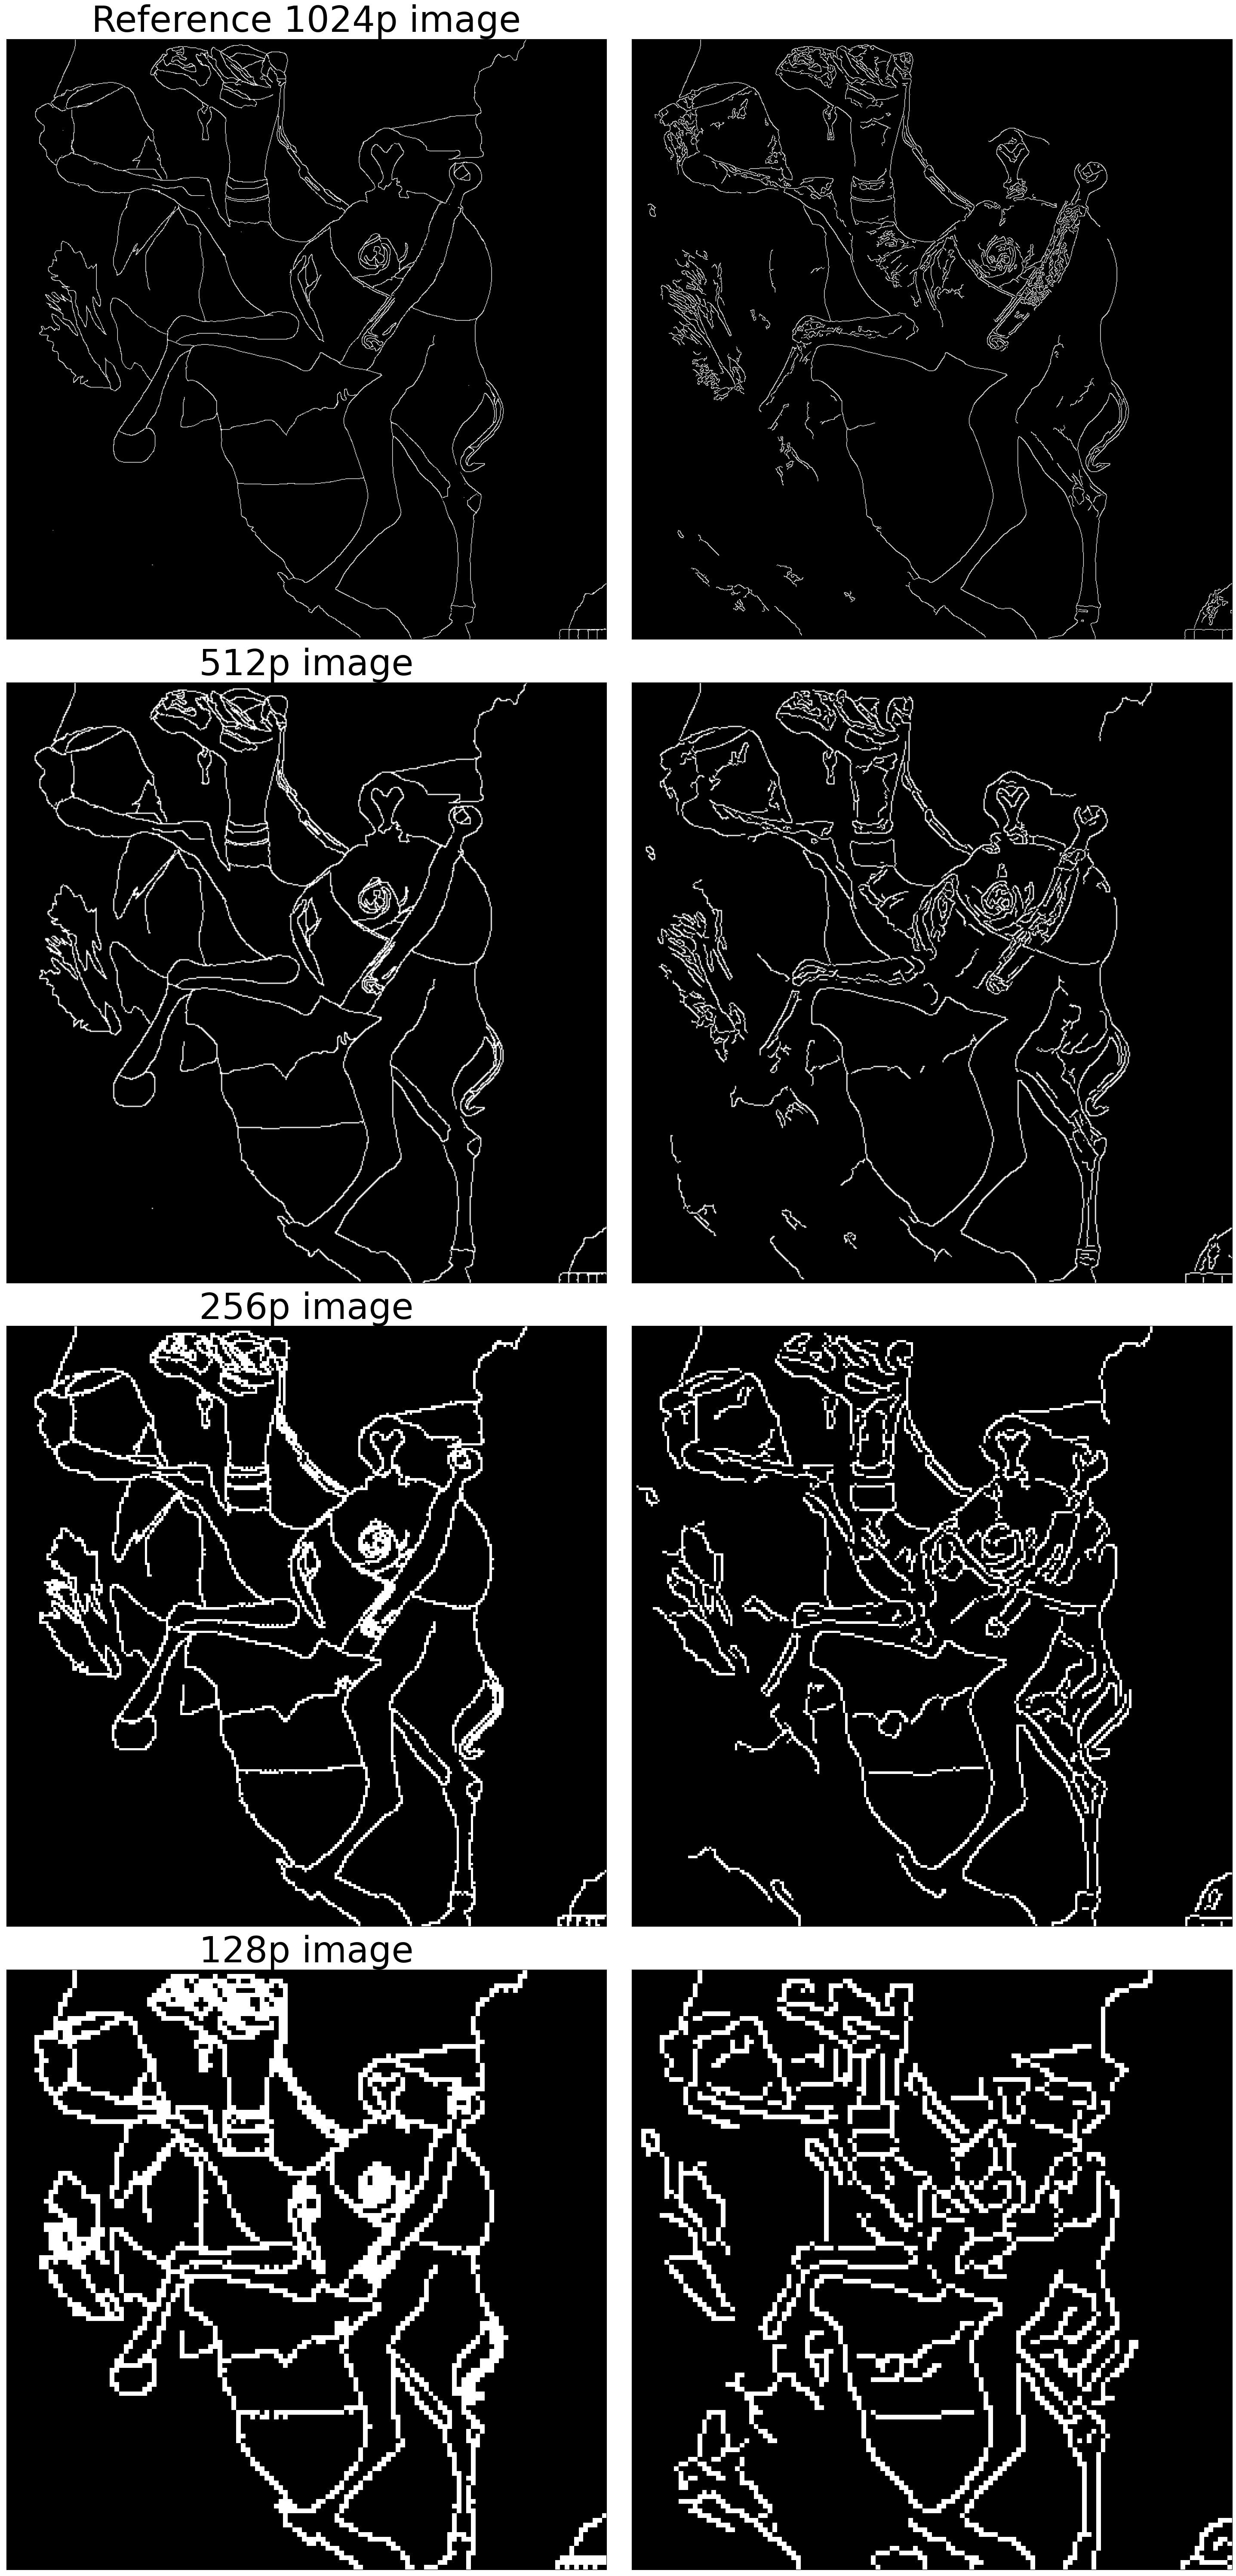

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score

# Load the images
image_full = cv2.imread('./images/DALLE-camel.png', cv2.IMREAD_GRAYSCALE)
image_half = cv2.imread('./images/DALLE-camel-half.png', cv2.IMREAD_GRAYSCALE)
image_quart = cv2.imread('./images/DALLE-camel-quart.png', cv2.IMREAD_GRAYSCALE)
image_eighth = cv2.imread('./images/DALLE-camel-eighth.png', cv2.IMREAD_GRAYSCALE)

# Apply Gaussian smoothing
blurred_full = cv2.GaussianBlur(image, (5, 5), 0)
blurred_half = cv2.GaussianBlur(image_half, (5, 5), 0)
blurred_quart = cv2.GaussianBlur(image_quart, (5, 5), 0)
blurred_eighth = cv2.GaussianBlur(image_eighth, (5, 5), 0)

# Edge detection
t1 = 30
t2 = 100
Im_1 = cv2.Canny(blurred_full, threshold1=t1, threshold2=t2)
Im_2 = cv2.Canny(blurred_half, threshold1=t1, threshold2=t2)
Im_3 = cv2.Canny(blurred_quart, threshold1=t1, threshold2=t2)
Im_4 = cv2.Canny(blurred_eighth, threshold1=t1, threshold2=t2)

# Load ground_truth_images
Im_1_gt = cv2.imread('./images/DALLE-camel-truth.png', cv2.IMREAD_GRAYSCALE)
Im_2_gt = cv2.imread('./images/DALLE-camel-truth-half.png', cv2.IMREAD_GRAYSCALE)
Im_3_gt = cv2.imread('./images/DALLE-camel-truth-quart.png', cv2.IMREAD_GRAYSCALE)
Im_4_gt = cv2.imread('./images/DALLE-camel-truth-eighth.png', cv2.IMREAD_GRAYSCALE)

# Create a DataFrame to store the evaluation metrics
data = {
    "Image": ["1024p", "512p", "256p", "128p"],
    "Precision": [],
    "Recall": [],
    "F1-score": []}


# Calculate evaluation metrics for each result and add to the DataFrame
average = 'weighted'
for edges, truth, label in zip([Im_1, Im_2, Im_3, Im_4], [Im_1_gt, Im_2_gt, Im_3_gt, Im_4_gt], data["Image"]):
    edges_binary = (edges > 0).astype(np.uint8) * 255
    truth_binary = (truth > 0).astype(np.uint8) * 255
    precision = precision_score(truth_binary, edges_binary, average=average)
    recall = recall_score(truth_binary, edges_binary, average=average)
    f1 = f1_score(truth_binary, edges_binary, average=average)

    data["Precision"].append(precision)
    data["Recall"].append(recall)
    data["F1-score"].append(f1)

# Create a pandas DataFrame
df = pd.DataFrame(data)

print(df)

plt.figure(figsize=(30, 60))
fontsize = 60

plt.subplot(421)
plt.imshow(Im_1_gt, cmap='gray')
plt.title('Reference 1024p image', fontsize=fontsize)
plt.xticks([]), plt.yticks([])

plt.subplot(422)
plt.imshow(Im_1, cmap='gray')
plt.xticks([]), plt.yticks([])

plt.subplot(423)
plt.imshow(Im_2_gt, cmap='gray')
plt.title('512p image', fontsize=fontsize)
plt.xticks([]), plt.yticks([])

plt.subplot(424)
plt.imshow(Im_2, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.tight_layout()

plt.subplot(425)
plt.imshow(Im_3_gt, cmap='gray')
plt.title('256p image', fontsize=fontsize)
plt.xticks([]), plt.yticks([])

plt.subplot(426)
plt.imshow(Im_3, cmap='gray')
plt.xticks([]), plt.yticks([])

plt.subplot(427)
plt.imshow(Im_4_gt, cmap='gray')
plt.title('128p image', fontsize=fontsize)
plt.xticks([]), plt.yticks([])

plt.subplot(428)
plt.imshow(Im_4, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.tight_layout()

plt.show()


array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

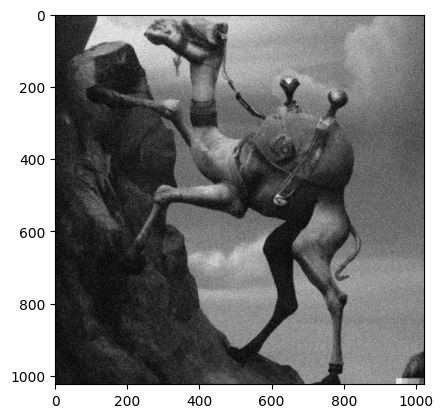

In [ ]:
plt.imshow(noisy_image_3, cmap='gray')
np.unique(noisy_image_1)

In [ ]:
from skimage.util import random_noise

# Gaussian white noise with variance of 0.01 
Im_gauss = random_noise(Im,  mode='gaussian', mean=0, var=0.01) 

# Salt and pepper noise on 5% of the pixels
Im_SP = random_noise(Im, 's&p', amount=0.05) 

In [ ]:
# Assuming 'ground_truth_image' contains the ground truth edges
ground_truth_image = cv2.imread('./images/DALLE-camel-truth.png', cv2.IMREAD_GRAYSCALE)
ground_truth_binary = (ground_truth_image > 0)

edges_binary = (Ib3_edges > 0)
np.unique(edges_binary)
np.unique(ground_truth_binary)
ground_truth_binary


array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [ ]:


print(precision_score(ground_truth_binary, edges_binary, average='micro'))
print(precision_score(ground_truth_binary, edges_binary, average='macro'))
print(precision_score(ground_truth_binary, edges_binary, average='weighted'))
print(precision_score(ground_truth_binary, edges_binary, average='samples'))


0.31932419151027286
0.310099819124958
0.3813552564813872
0.366922788437518


    Method  Precision    Recall  F1-score
0    Canny   0.509767  0.620472  0.544967
1    Sobel   0.365641  0.473278  0.391437
2  Prewitt   0.365773  0.469194  0.389393
3      LoG   0.097093  0.244984  0.134392


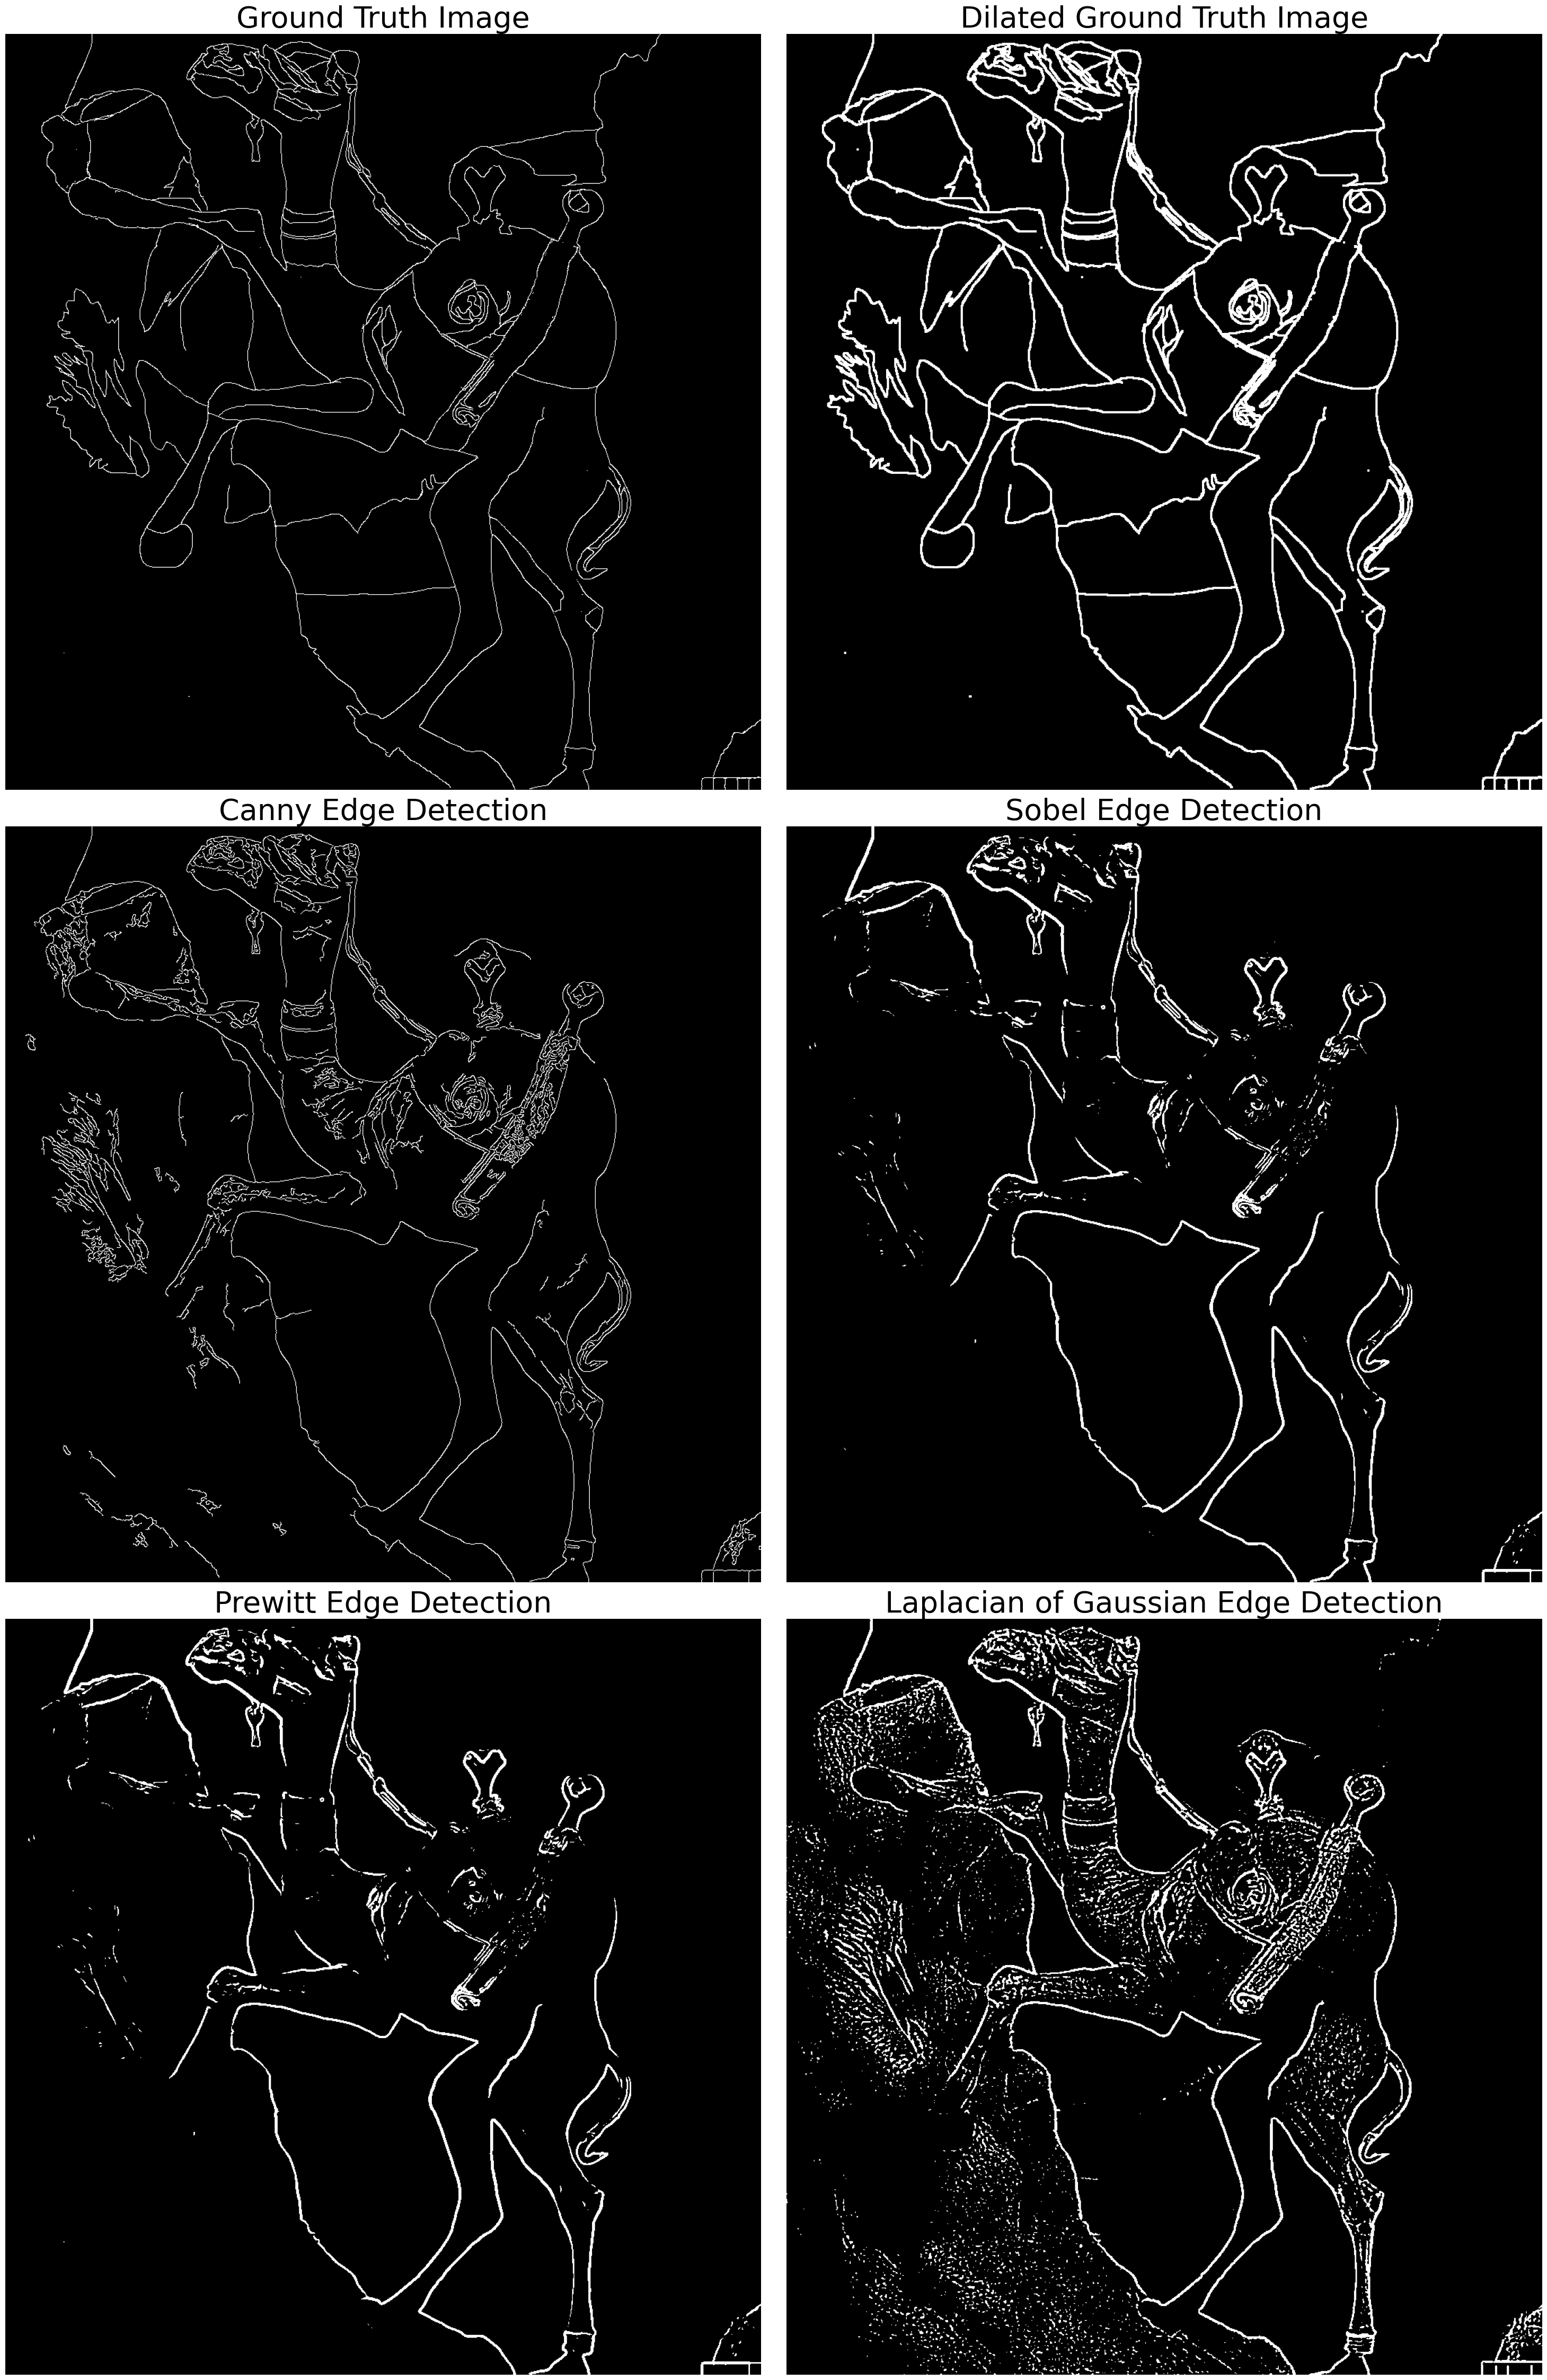

In [253]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from skimage import filters
from sklearn.metrics import precision_score, recall_score, f1_score

# Load the original image
image = cv2.imread('./images/DALLE-camel.png', cv2.IMREAD_GRAYSCALE)

# Apply Gaussian smoothing
blurred = cv2.GaussianBlur(image, (5, 5), 0)

# Edge detection using different methods
edges_canny = cv2.Canny(blurred, threshold1=30, threshold2=100)
edges_sobel = filters.sobel(blurred)
edges_prewitt = filters.prewitt(blurred)
edges_log = cv2.Laplacian(blurred, cv2.CV_64F, ksize=5)  # Laplacian of Gaussian

# Normalize the LoG edges
log_1 = edges_log - np.min(edges_log)
log_norm =  (log_1 / np.max(log_1))

# Threshold edges from Sobel, Prewitt, and Laplacian of Gaussian 
thresh = 0.07  
edges_sobel_binary = (edges_sobel > thresh).astype(np.uint8) * 255
edges_prewitt_binary = (edges_prewitt > thresh).astype(np.uint8) * 255
thresh = 0.61  
edges_log_binary = (log_norm > thresh).astype(np.uint8) * 255

# Load ground truth image
ground_truth = cv2.imread('./images/DALLE-camel-truth.png', cv2.IMREAD_GRAYSCALE)
ground_truth_dilated = cv2.imread('./images/DALLE-camel-truth-dilated.png', cv2.IMREAD_GRAYSCALE)
ground_truth_binary = (ground_truth > 0).astype(np.uint8) * 255

# Create a DataFrame to store the evaluation metrics
data = {
    "Method": ["Canny", "Sobel", "Prewitt", "LoG"],
    "Precision": [],
    "Recall": [],
    "F1-score": []
}

# Calculate evaluation metrics for each method and add to the DataFrame
average = 'weighted'
for edges_binary, method in zip([edges_canny, edges_sobel_binary, edges_prewitt_binary, edges_log_binary], data["Method"]):
    precision = precision_score(ground_truth_binary, edges_binary, average=average)
    recall = recall_score(ground_truth_binary, edges_binary, average=average)
    f1 = f1_score(ground_truth_binary, edges_binary, average=average)

    data["Precision"].append(precision)
    data["Recall"].append(recall)
    data["F1-score"].append(f1)

# Create a pandas DataFrame
df = pd.DataFrame(data)

print(df)

plt.figure(figsize=(30, 45))
fontsize = 40

plt.subplot(321)
plt.imshow(ground_truth, cmap='gray')
plt.title('Ground Truth Image', fontsize=fontsize)
plt.axis('off')

plt.subplot(322)
plt.imshow(ground_truth_dilated, cmap='gray')
plt.title('Dilated Ground Truth Image', fontsize=fontsize)
plt.axis('off')

plt.subplot(323)
plt.imshow(edges_canny, cmap='gray')
plt.title('Canny Edge Detection', fontsize=fontsize)
plt.axis('off')

plt.subplot(324)
plt.imshow(edges_sobel_binary, cmap='gray')
plt.title('Sobel Edge Detection', fontsize=fontsize)
plt.axis('off')

plt.subplot(325)
plt.imshow(edges_prewitt_binary, cmap='gray')
plt.title('Prewitt Edge Detection', fontsize=fontsize)
plt.axis('off')

plt.subplot(326)
plt.imshow(edges_log_binary, cmap='gray')
plt.title('Laplacian of Gaussian Edge Detection', fontsize=fontsize)
plt.axis('off')

plt.tight_layout()
plt.show()



True